In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
#Loading Training data
df_input = pd.read_csv('/Users/pk/Desktop/linear_regression/Training Data/Linear_X_Train.csv')
df_output= pd.read_csv('/Users/pk/Desktop/linear_regression/Training Data/Linear_Y_Train.csv')
df_output.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


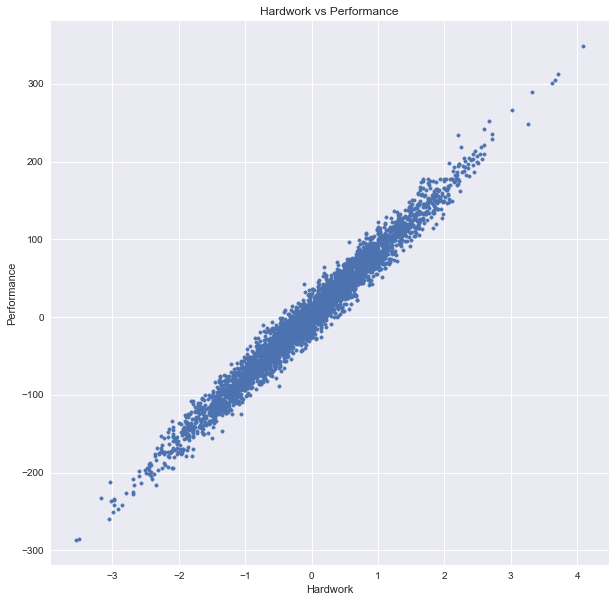

In [3]:
#concatenating input and output to a single dataframe and visualisation
df=pd.concat([df_input,df_output],axis=1)
x_array= df_input.values
y_array=df_output.values
plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.scatter(x_array,y_array,marker='.')
plt.title('Hardwork vs Performance')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()


In [4]:
#Check if normalisation is required in data
u= x_array.mean()
sigma_x=x_array.std()
u,sigma_x

(-0.03779466168006855, 0.9920801322508517)

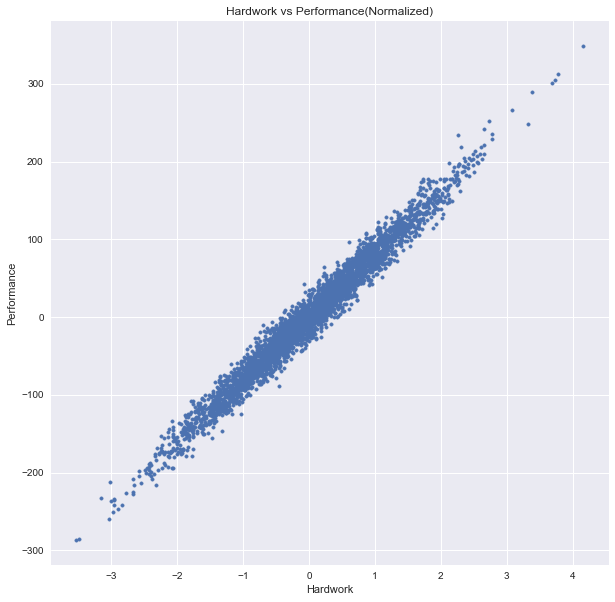

In [5]:
#data normalisation
x_array= (x_array-u)/sigma_x
plt.figure(figsize=(10,10))
plt.scatter(x_array,y_array,marker='.')
plt.title('Hardwork vs Performance(Normalized)')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

# Applying Linear Regression

In [6]:
def Hypothesis(theta,x):
    y_pred= theta[0]+(x*theta[1])
    return y_pred
def gradient(x,y,theta):
    m=x.shape[0]
    y_pred= Hypothesis(theta,x)
    diff= (y_pred-y)
    error=np.sum(diff**2)/m
    grad= np.zeros((2,))
    grad[0]=(2/m)*np.sum(diff)
    grad[1]=(2/m)*np.sum(np.multiply(diff,x))
    
    return grad,error
def graphError(error_list):
    plt.plot(error_list)
    plt.ylabel("Mean Squared Error")
    plt.xlabel("Epochs")
    plt.title('MSE per epoch')
    plt.show()
def gradient_descent(x,y,maxSteps=100,learningrate=0.1):
    error_list=[]
    theta=np.zeros((2,))
    theta_list=[]
    for i in range(maxSteps):
        grad,error= gradient(x,y,theta)
        error_list.append(error)
        theta[0]= theta[0]-learningrate*grad[0]
        theta[1]= theta[1]-learningrate*grad[1]
        theta_list.append(theta.tolist())
    graphError(error_list)  
    return theta,theta_list,error_list

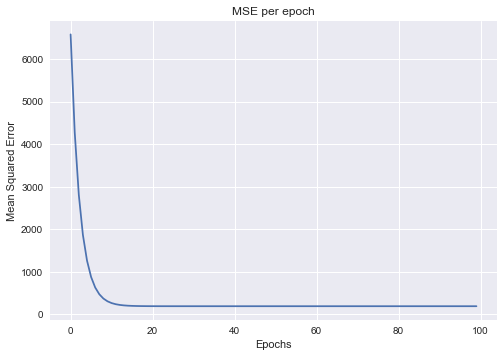

Parameter of line are [ 0.68386897 79.90573693]


In [7]:
theta_list=list([])
theta,theta_list,error_list= gradient_descent(x_array,y_array,100,0.1)
print("Parameter of line are", theta)



In [8]:
print(theta_list)

[[0.13677379360311764, 15.981147388499961], [0.2461928284856118, 28.766065299299925], [0.3337280563916072, 38.9939996279399], [0.40375623871640354, 47.17634709085188], [0.45977878457624055, 53.72222506118146], [0.5045968212641098, 58.958927437445126], [0.5404512506144054, 63.14828933845606], [0.5691347940946417, 66.49977885926481], [0.5920816288788311, 69.1809704759118], [0.6104390967061825, 71.3259237692294], [0.6251250709680634, 73.04188640388348], [0.6368738503775682, 74.41465651160674], [0.6462728739051723, 75.51287259778535], [0.6537920927272554, 76.39144546672823], [0.6598074677849216, 77.09430376188254], [0.664619767831055, 77.65659039800599], [0.6684696078679615, 78.10641970690475], [0.6715494798974867, 78.46628315402376], [0.6740133775211066, 78.75417391171896], [0.675984495620003, 78.98448651787513], [0.6775613900991201, 79.16873660280005], [0.6788229056824137, 79.31613667074], [0.6798321181490488, 79.43405672509195], [0.6806394881223564, 79.52839276857351], [0.68128538410100

# PLOTTING THE REGRESSION LINE

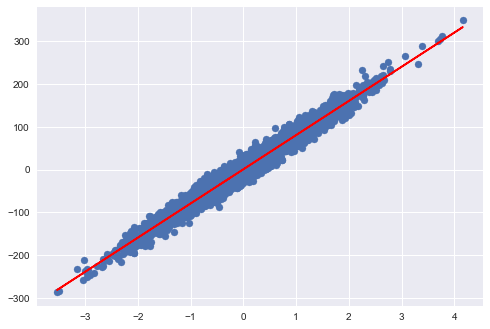

In [9]:
plt.scatter(x_array,y_array)

out=x_array*theta[1]+theta[0]
plt.plot(x_array,out,color='r')
plt.show()


# predictions on test data

In [10]:
x_test= pd.read_csv('./Test Cases/Linear_X_Test.csv')
y_test= Hypothesis(theta,x_test)
print(y_test)
prediction_df= pd.DataFrame(np.array(y_test),columns=['y'])
prediction_df.to_csv('predictions.csv',index=False)

               x
0    -149.374663
1     -68.756767
2    -201.492222
3     221.240119
4      47.908170
...          ...
1245  -12.744968
1246   75.173799
1247   10.912428
1248  -21.532930
1249  -53.686026

[1250 rows x 1 columns]


# scoring on the training data (R2 SCORE)

In [11]:
def R2Score(y_array,out):
    num= np.sum((y_array-out)**2)
    den= np.sum((y_array-np.mean(y_array))**2)
    return (1-num/den)*100

In [12]:
R2Score(y_array,out)

97.09612233822354

# Surface Plot Contour Plot and Trajectory of Parameters

In [13]:
print(theta)
T0= theta[0]
T1= theta[1]
T0,T1


[ 0.68386897 79.90573693]


(0.6838689678762822, 79.9057369262227)

In [14]:
T0_ranges= np.arange(-40,40,1)
T1_ranges=np.arange(40,120,1)

T0_ranges,T1_ranges= np.meshgrid(T0_ranges,T1_ranges)
print(T0_ranges.shape)
print(T1_ranges.shape)
T0_ranges,T1_ranges
T0_ranges= np.array(T0_ranges)
T1_ranges= np.array(T1_ranges)
type(T0_ranges),type(T1_ranges)

(80, 80)
(80, 80)


(numpy.ndarray, numpy.ndarray)

In [15]:
theta_list=np.array(theta_list)
print(type(theta_list))

<class 'numpy.ndarray'>


In [16]:
T0_ranges,T1_ranges

(array([[-40, -39, -38, ...,  37,  38,  39],
        [-40, -39, -38, ...,  37,  38,  39],
        [-40, -39, -38, ...,  37,  38,  39],
        ...,
        [-40, -39, -38, ...,  37,  38,  39],
        [-40, -39, -38, ...,  37,  38,  39],
        [-40, -39, -38, ...,  37,  38,  39]]),
 array([[ 40,  40,  40, ...,  40,  40,  40],
        [ 41,  41,  41, ...,  41,  41,  41],
        [ 42,  42,  42, ...,  42,  42,  42],
        ...,
        [117, 117, 117, ..., 117, 117, 117],
        [118, 118, 118, ..., 118, 118, 118],
        [119, 119, 119, ..., 119, 119, 119]]))

In [17]:
y_array

array([[-9.11011171e-02],
       [-5.34677208e+01],
       [ 7.54570088e+01],
       ...,
       [-3.49832749e+01],
       [ 1.45206092e+02],
       [-1.71244939e+01]])

In [31]:
#MSE ARRAY
m=T0_ranges.shape[0]
n=T1_ranges.shape[0]
J= np.zeros((m,n))
for i in range(m):
    for j in range(n):
        y_= T1_ranges[i][j]*x_array+T0_ranges[i,j]
        J[i][j]=np.sum((y_- y_array)**2)/x_array.shape[0]


In [32]:
theta

array([ 0.68386897, 79.90573693])

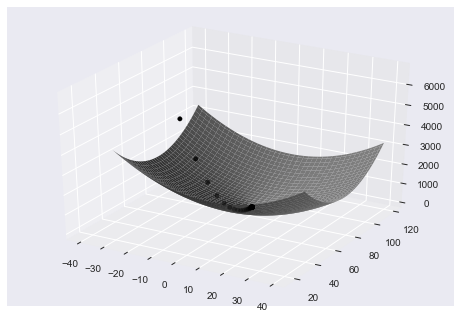

In [38]:
plt.style.use('seaborn')
from mpl_toolkits.mplot3d import axes3d
fig= plt.figure()
axes= fig.gca(projection='3d')
axes.plot_surface(T0_ranges,T1_ranges,J,color='gray')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,color='black')
plt.show()

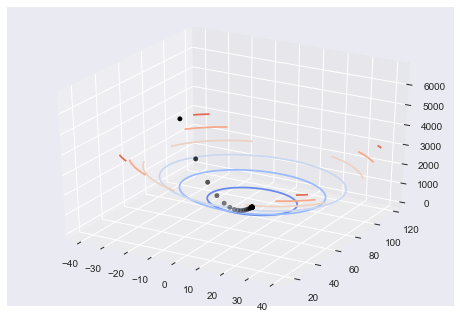

In [37]:
fig= plt.figure()
axes= fig.gca(projection='3d')
axes.contour3D(T0_ranges,T1_ranges,J,cmap='coolwarm')
axes.scatter(theta_list[:,0],theta_list[:,1],zs=error_list,color='black')
plt.show()

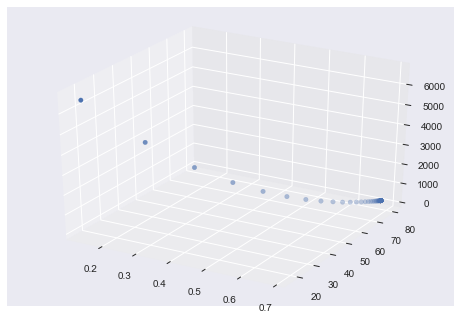

In [34]:
plt.figure().gca(projection='3d').scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()